In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import signal
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write
from time import sleep

# Test recording / playing sounds

In [2]:
duration = 8
fs = 44100
myrecording = sd.rec(duration * fs, samplerate=fs, channels=1)
print("Done!")

Done!


In [3]:
sd.play(myrecording, fs)

<class 'numpy.ndarray'>
352800
[[ 0.99996948]
 [ 0.99996948]
 [ 0.99996948]
 ..., 
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]


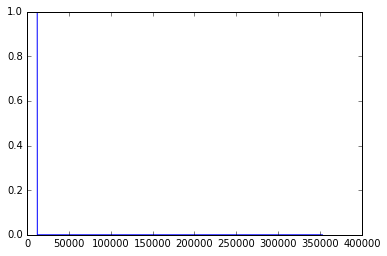

In [4]:
print(type(myrecording))
print(len(myrecording))
print(myrecording)
plt.plot(myrecording)
plt.show()

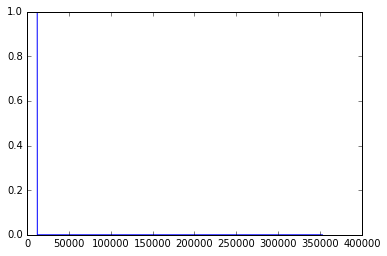

In [5]:
for i in range(myrecording.size):
    if myrecording[i] < 0:
        myrecording[i] = 0
plt.plot(myrecording)
plt.show()

# Test generating sounds

In [6]:
def zero_or_one(tone_array, i, one_tone, zero_tone):
    
    if i == 0:
        tone_array = np.concatenate((tone_array, zero_tone))
        print("zero")
    else:
        tone_array = np.concatenate((tone_array, zero_tone))
        tone_array = np.concatenate((tone_array, one_tone))
        print("one")
        
    return tone_array

In [7]:
sd.default.samplerate = 44100

time = .3
frequency = 440

# Generate time of samples between 0 and time seconds
samples = np.arange(44100 * time) / 44100.0
# Recall that a sinusoidal wave of frequency f has formula w(t) = A*sin(2*pi*f*t)

one_tone = 10000 * np.sin(2 * np.pi * frequency * samples)
zero_tone = samples * 0

# Convert it to wav format (16 bits)


In [8]:
tone_array = one_tone

for i in [1,1,0,1,1,1,1,0,1,0,0,1,0,0,1]:
    tone_array = zero_or_one(tone_array, i, one_tone, zero_tone)

tone_array = np.array(tone_array, dtype=np.int16)

one
one
zero
one
one
one
one
zero
one
zero
zero
one
zero
zero
one


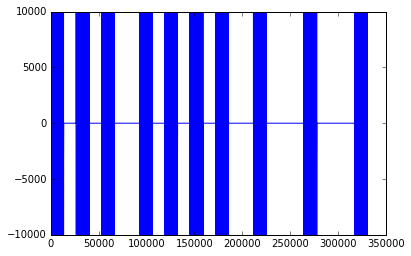

In [17]:
sd.play(tone_array, blocking=True)
plt.plot(tone_array)

In [ ]:
np.mean(myrecording)